In [1]:
import sys
import numpy              as np
import pandas             as pd
import seaborn            as sns
import matplotlib.pyplot  as plt

from   model.user_item_dataset          import UserItemDataset
from   misc.dataset_stats               import plot_statistics

In [2]:
# PLOTTING CONFIGURATIONS
# enable inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # set format to svg for better resolution
sns.set_theme() # apply default theme in seaborn

## Dataset loading

In [3]:
# Load dataset
my_dataset = UserItemDataset()
my_dataset.load_data(info_filepath='../datasets/ml-100k/u.info',
                     users_filepath='../datasets/ml-100k/u.user',
                     items_filepath='../datasets/ml-100k/u.item',
                     genres_filepath='../datasets/ml-100k/u.genre',
                     ratings_filepath='../datasets/ml-100k/u.data')

### Dataset subset

---

* Genres: 'Action', 'Romance'

In [4]:
# Define genres of interest (I_0 and I_1)
genres_of_interest = ['Action', 'Romance']

# Note: i-th element of array user_original_ids corresponds to the real user-id (from 0 to n-1)
#       of user in i-th row of array R
user_original_ids, item_original_ids, R = my_dataset.filter_interactions_by_genre(genres_of_interest,
                                                                                  exclusive=True)
# Seperate item group mapped ids for group 0 and group 1
item_group_mapped_ids_0, item_group_mapped_ids_1 = [], []
for i in range(item_original_ids.shape[0]):
    if my_dataset.is_genre(item_original_ids[i], genres_of_interest[0]):
        item_group_mapped_ids_0.append(i)
    else:
        item_group_mapped_ids_1.append(i)

# Transform to numpy arrays
item_group_mapped_ids_0, item_group_mapped_ids_1 = np.array(item_group_mapped_ids_0), np.array(item_group_mapped_ids_1)

# Plot statistics about the subset of dataset
# plot_statistics(dataset=my_dataset,
#                 genres=genres_of_interest,
#                 user_original_ids=user_original_ids,
#                 item_original_ids=item_original_ids,
#                 R=R)

### Read items info in pandas

In [5]:
# Read all genres
with open('../datasets/ml-100k/u.genre') as f:
    genres = [l.split('|')[0] for l in f.readlines()]

cols = ['title', 'date', 'garbage', 'url'] + genres # Make list with column names

# Read items file in pandas
items_df = pd.read_csv('../datasets/ml-100k/u.item', sep='|', encoding='ISO-8859-1', names=cols, header=None)
items_df.drop(['garbage', 'url'], axis=1, inplace=True)

### Print various statistics

In [20]:
print(f"#users with #ratings < 5: {np.count_nonzero(np.sum(R, axis=1) < 5)}")
print(f"#users with #ratings < 10: {np.count_nonzero(np.sum(R, axis=1) < 10)}")
# print(f"#users with 0 ratings in Action: {np.count_nonzero(np.sum(R[:, item_group_mapped_ids_0], axis=1) == 0)}")
# print(f"#users with 0 ratings in Romance: {np.count_nonzero(np.sum(R[:, item_group_mapped_ids_1], axis=1) == 0)}")

#users with #ratings < 5: 25
#users with #ratings < 10: 193


In [11]:
R_filtered = np.delete(R, np.sum(R, axis=1) < 10, axis=0)
R_filtered.shape

(750, 448)

In [11]:
num_top = 70
# Calcualate popularity of items
top_items_0_pop = np.sum(R[:, item_group_mapped_ids_0], axis=0)/R.shape[0]
top_items_1_pop = np.sum(R[:, item_group_mapped_ids_1], axis=0)/R.shape[0]
top_items_0 = np.argsort(top_items_0_pop)[::-1][:num_top]
top_items_1 = np.argsort(top_items_1_pop)[::-1][:num_top]

In [14]:
action_df=items_df.iloc[item_original_ids[item_group_mapped_ids_0[top_items_0]]].loc[:, ['title','Action','Romance']]
action_df['Popularity'] = top_items_0_pop[top_items_0]
action_df

,title,Action,Romance,Popularity
300,Air Force One (1997),1,0,0.457052
121,Independence Day (ID4) (1996),1,0,0.454931
174,Raiders of the Lost Ark (1981),1,0,0.445387
127,"Godfather, The (1972)",1,0,0.437964
117,"Rock, The (1996)",1,0,0.400848
...,...,...,...,...
260,Event Horizon (1997),1,0,0.134677
62,Stargate (1994),1,0,0.134677
343,Alien: Resurrection (1997),1,0,0.131495
233,Under Siege (1992),1,0,0.131495


In [14]:
romance_df=items_df.iloc[item_original_ids[item_group_mapped_ids_1[top_items_1]]].loc[:, ['title','Action','Romance']]
romance_df['Popularity'] = top_items_1_pop[top_items_1]
romance_df

,title,Action,Romance,Popularity
286,"English Patient, The (1996)",0,1,0.510074
237,Jerry Maguire (1996),0,1,0.407211
69,Forrest Gump (1994),0,1,0.340403
276,Leaving Las Vegas (1995),0,1,0.316013
216,When Harry Met Sally... (1989),0,1,0.307529
202,Groundhog Day (1993),0,1,0.296925
111,"Truth About Cats & Dogs, The (1996)",0,1,0.288441
275,Sense and Sensibility (1995),0,1,0.284199
268,Chasing Amy (1997),0,1,0.270414
70,Four Weddings and a Funeral (1994),0,1,0.266172


*Plot the popularity histograms for Action and Romance:*

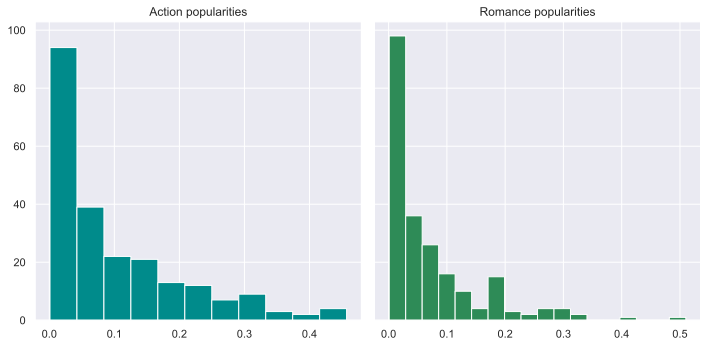

In [7]:
action_pop_all = np.sum(R[:, item_group_mapped_ids_0], axis=0)/R.shape[0]
romance_pop_all = np.sum(R[:, item_group_mapped_ids_1], axis=0)/R.shape[0]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10, 5), dpi=120, sharey=True)
ax1.hist(action_pop_all, bins='auto', color='darkcyan')
ax1.set_title("Action popularities")
ax2.hist(romance_pop_all, bins='auto', color='seagreen')
ax2.set_title("Romance popularities")

plt.tight_layout()
plt.show()